In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Acquire the data

In [398]:
df=pd.read_csv("11-8-Dataset-Identify Fake Job Posting.csv")

In [399]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [400]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [401]:
df.shape

(17880, 18)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [403]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [404]:
df.dropna(inplace=True)

In [405]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [406]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
102,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17734,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17759,17760,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17849,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0


# 2.Preprocess the data

In [407]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [408]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,0,255,10,12,83,67,677,613,510,0,1,1,1,5,4,50,20,0
15,1,596,91,193,23,89,24,316,94,0,1,1,1,3,1,24,31,0
23,2,599,110,37,9,165,2,304,119,0,1,0,1,3,7,38,31,0
98,3,269,100,155,294,196,250,414,82,0,1,1,1,5,3,49,23,1
102,4,346,43,147,43,125,532,183,232,1,1,0,1,2,1,38,22,0


In [409]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17734,769,138,197,66,139,71,568,288,446,1,1,0,1,2,3,55,7,1
17759,770,138,167,66,139,71,568,288,446,1,1,0,1,2,3,55,7,1
17813,771,138,178,66,139,71,568,288,446,1,1,0,1,2,3,55,7,1
17849,772,100,120,80,274,29,113,479,428,0,1,0,1,5,1,12,9,0
17865,773,401,32,193,63,175,105,181,500,0,1,1,1,2,1,55,31,0


In [410]:
df.isna().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [411]:
df.describe()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,386.500000,311.846253,102.099483,129.888889,154.916021,93.408269,347.267442,307.076227,260.149871,0.094315,0.978036,0.673127,1.027132,2.852713,2.581395,32.574935,18.068475,0.093023
std,223.578845,181.084996,63.345878,61.661603,81.876406,57.577497,203.020942,181.628427,151.007717,0.292456,0.146660,0.469374,0.455568,2.188766,2.258339,16.049130,9.307272,0.290653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193.250000,144.000000,34.000000,84.000000,93.250000,37.250000,169.000000,153.250000,127.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,12.000000,0.000000
50%,386.500000,314.500000,100.500000,139.500000,159.000000,96.500000,349.500000,296.500000,269.500000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,35.000000,18.000000,0.000000
75%,579.750000,474.000000,165.750000,193.000000,223.000000,145.000000,530.750000,460.750000,384.750000,0.000000,1.000000,1.000000,1.000000,5.000000,3.000000,45.000000,25.000000,0.000000
max,773.000000,614.000000,216.000000,242.000000,299.000000,197.000000,692.000000,640.000000,525.000000,1.000000,1.000000,1.000000,4.000000,6.000000,9.000000,67.000000,35.000000,1.000000


In [412]:
df["fraudulent"].value_counts()

0    702
1     72
Name: fraudulent, dtype: int64

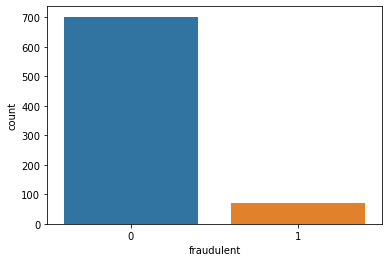

In [413]:
sns.countplot(x="fraudulent",data=df)

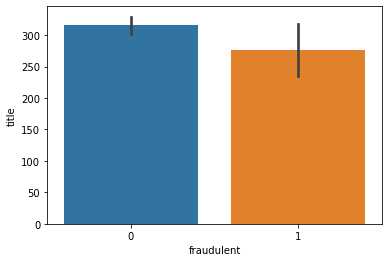

In [414]:
sns.barplot(x="fraudulent",y="title",data=df)

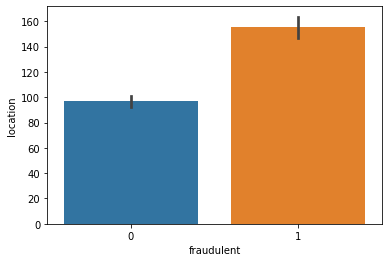

In [415]:
sns.barplot(x="fraudulent",y="location",data=df)

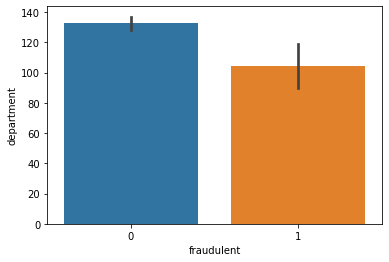

In [416]:
sns.barplot(x="fraudulent",y="department",data=df)

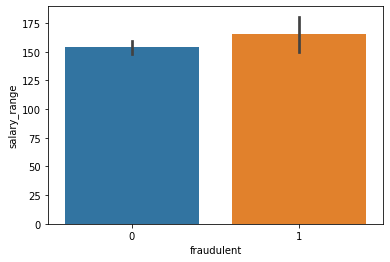

In [417]:
sns.barplot(x="fraudulent",y="salary_range",data=df)

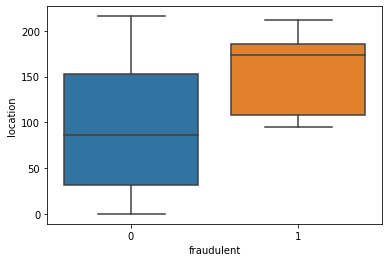

In [418]:
sns.boxplot(x="fraudulent",y="location",data=df)

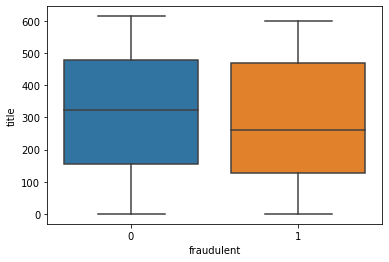

In [419]:
sns.boxplot(x="fraudulent",y="title",data=df)

In [420]:
X=df.drop(["job_id","telecommuting","has_company_logo","has_questions","fraudulent"],axis=1)
y=df["fraudulent"]

In [421]:
X.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
6,255,10,12,83,67,677,613,510,1,5,4,50,20
15,596,91,193,23,89,24,316,94,1,3,1,24,31
23,599,110,37,9,165,2,304,119,1,3,7,38,31
98,269,100,155,294,196,250,414,82,1,5,3,49,23
102,346,43,147,43,125,532,183,232,1,2,1,38,22


In [422]:
y.value_counts()

0    702
1     72
Name: fraudulent, dtype: int64

# 3.Split the data

In [423]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=112)

In [424]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Logistic Regression

## 4.Train the data

In [425]:
from sklearn.linear_model import LogisticRegression
my_model=LogisticRegression()
result=my_model.fit(X_train,y_train)

In [426]:
predictions=result.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [427]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9096774193548387

In [428]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test,predictions)
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predicted neg","predicted pos"])
confusion_df

,predicted neg,predicted pos
actual neg,140,1
actual pos,13,1


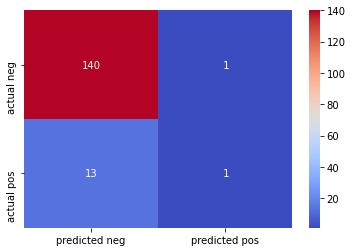

In [429]:
sns.heatmap(confusion_df,cmap="coolwarm",annot=True,fmt="2.0f")

In [430]:
from sklearn import metrics
print("**Classification report:\n",metrics.classification_report(y_test,predictions))

**Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       141
           1       0.50      0.07      0.12        14

    accuracy                           0.91       155
   macro avg       0.71      0.53      0.54       155
weighted avg       0.88      0.91      0.88       155



## 5.Test the model

In [431]:
new_pred=result.predict([[255,10,12,83,67,677,613,510,1,5,4,50,20]])
new_pred

array([1])

## 6.Deploy the model

In [432]:
new_pred=result.predict([[6837,2345,758,345,1524,3777,6001,2,4,13,121,11,22]])
new_pred

array([1])

In [433]:
"""Accuracy given by logistic regression model is: 0.909
"""

'Accuracy given by logistic regression model is: 0.909\n'

# Decision Tree

## 1.Train the Model

In [434]:
from sklearn.tree import DecisionTreeClassifier
my_model=DecisionTreeClassifier(random_state=12)
result=my_model.fit(X_train,y_train)

In [435]:
predictions=result.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0])

In [436]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9741935483870968

In [437]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test,predictions)
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predicted neg","predicted pos"])
confusion_df

,predicted neg,predicted pos
actual neg,140,1
actual pos,3,11


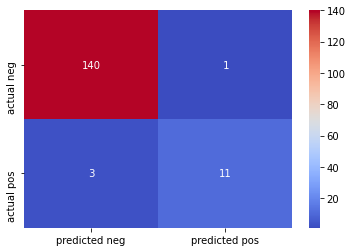

In [438]:
sns.heatmap(confusion_df,cmap="coolwarm",annot=True,fmt="2.0f")

In [439]:
from sklearn import metrics
print("**classification report:\n",metrics.classification_report(y_test,predictions))

**classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       141
           1       0.92      0.79      0.85        14

    accuracy                           0.97       155
   macro avg       0.95      0.89      0.92       155
weighted avg       0.97      0.97      0.97       155



## 2.Test the Model

In [440]:
new_pred=result.predict([[255,10,12,83,67,677,613,510,1,5,4,50,20]])
new_pred

array([1])

## 3.Deploy the model

In [441]:
new_pred=result.predict([[2345,1095,1161,777,45,3456,10867,5678,2,7,4,55,7]])
new_pred

array([1])

In [442]:
""" Accuracy for Decision tree model is : 0.9741
"""

' Accuracy for Decision tree model is : 0.9741\n'

# Random Forest Algorithem

## 1.Train the data

In [443]:
from sklearn.ensemble import RandomForestClassifier
my_model=RandomForestClassifier(n_estimators=50,random_state=112,criterion="entropy")
result=my_model.fit(X_train,y_train)

In [444]:
predictions=result.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0])

In [445]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.967741935483871

In [446]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test,predictions)
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predicted neg","predicted pos"])
confusion_df

,predicted neg,predicted pos
actual neg,141,0
actual pos,5,9


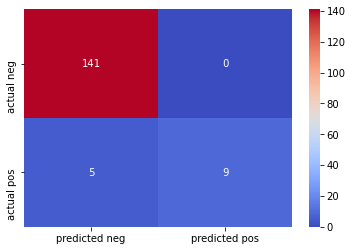

In [447]:
sns.heatmap(confusion_df,cmap="coolwarm",annot=True,fmt="2.0f")

## 2.Test the model

In [448]:
new_pred=result.predict([[255,10,12,83,67,677,613,510,1,5,4,50,20]])
new_pred

array([1])

## 3.Deploy the model

In [449]:
new_pred=result.predict([[10993,1234,1222,867,1298,5432,8867,2234,5,1,1,51,16]])
new_pred

array([1])

In [450]:
"""Accuracy for random forest model is:0.9677
"""

'Accuracy for random forest model is:0.9677\n'

## SVM algorithem

## 1.train the model

In [451]:
from sklearn.svm import SVC
my_model=SVC(kernel="rbf",random_state=134)
result=my_model.fit(X_train,y_train)

In [452]:
predictions=result.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [453]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9419354838709677

In [454]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test,predictions)
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predicted neg","predicted pos"])
confusion_df

,predicted neg,predicted pos
actual neg,141,0
actual pos,9,5


In [455]:
from sklearn import metrics
print("**Classification report:\n",metrics.classification_report(y_test,predictions))

**Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       141
           1       1.00      0.36      0.53        14

    accuracy                           0.94       155
   macro avg       0.97      0.68      0.75       155
weighted avg       0.95      0.94      0.93       155



## 2.Test the model

In [456]:
new_pred=result.predict([[255,10,12,83,67,677,613,510,1,5,4,50,20]])
new_pred

array([0])

## 3.Deploy the Model

In [457]:
new_pred=result.predict([[10956,1234,1232,7777,867,1234,7658,6496,2234,1,4,7,21]])
new_pred

array([0])

In [458]:
"""Accuracy for SVM model is:0.941
"""

'Accuracy for SVM model is:0.941\n'

# KNN algorithem

## 1.Train the model

In [459]:
from sklearn.neighbors import KNeighborsClassifier
my_model=KNeighborsClassifier(n_neighbors=5)
result=my_model.fit(X_train,y_train)

In [460]:
predictions=result.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0])

In [461]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9419354838709677

In [462]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_test,predictions)
confusion_df=pd.DataFrame(confusion_mat,index=["actual neg","actual pos"],columns=["predicted neg","predicted pos"])
confusion_df

,predicted neg,predicted pos
actual neg,139,2
actual pos,7,7


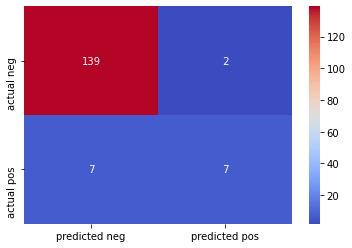

In [463]:
sns.heatmap(confusion_df,cmap="coolwarm",annot=True,fmt="2.0f")

In [464]:
from sklearn import metrics
print("**classification report:\n",metrics.classification_report(y_test,predictions))

**classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       141
           1       0.78      0.50      0.61        14

    accuracy                           0.94       155
   macro avg       0.86      0.74      0.79       155
weighted avg       0.94      0.94      0.94       155



## 2.Test the model

In [465]:
new_pred=result.predict([[255,10,12,83,67,677,613,510,1,5,4,50,20]])
new_pred

array([0])

## 3.Deploy the model

In [466]:
new_pred=result.predict([[10954,1341,1321,874,1210,5724,6495,2254,1,5,1,51,16]])
new_pred

array([0])

In [467]:
"""accuracy of KNN model is:0.9419
"""

'accuracy of KNN model is:0.9419\n'

# The best model is Decision Tree with accuracy of 0.9741